In [2]:
library(tidyverse)


# Time Series

In [3]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


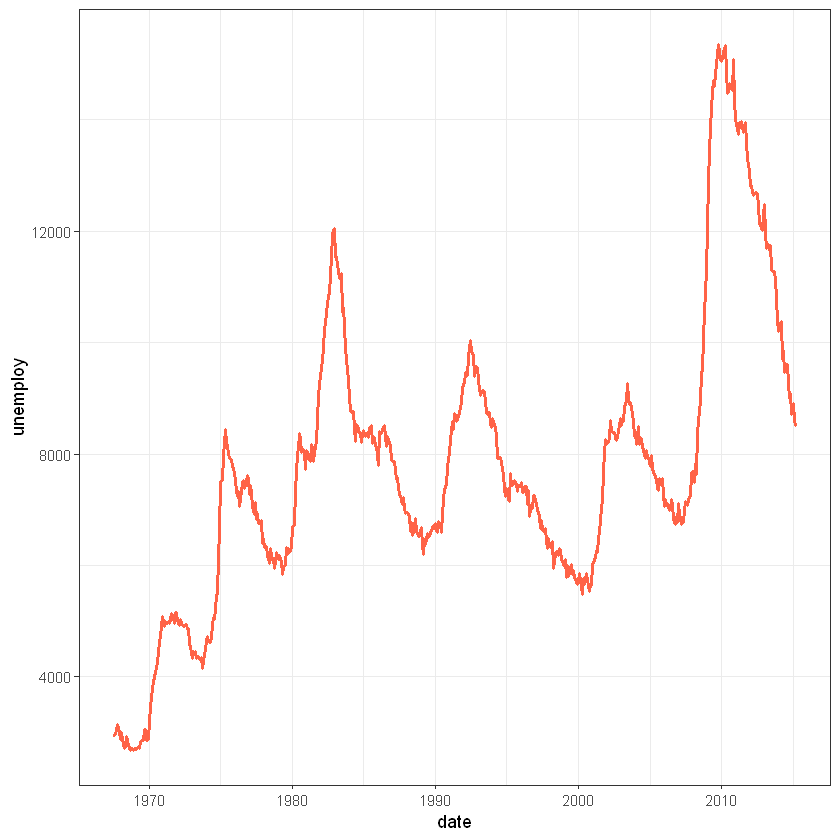

In [7]:
economics %>%
ggplot(aes(date, unemploy)) +
geom_line(color = 'tomato', size = 1) + 
theme_bw()

# Stacked Area Chart

Stacked area chart is just like a line chart, except that the region below the plot is all colored. This is typically used when:

* You want to describe how a quantity or volume (rather than something like price) changed over time
* You have many data points. For very few data points, consider plotting a bar chart.
* You want to show the contribution from individual components.

In [8]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')


In [11]:
apple <- read.csv('./appl_1980_2014.csv')
head(apple)

Date,Open,High,Low,Close,Volume,Adj.Close
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93


In [29]:
?scale_x_datetime

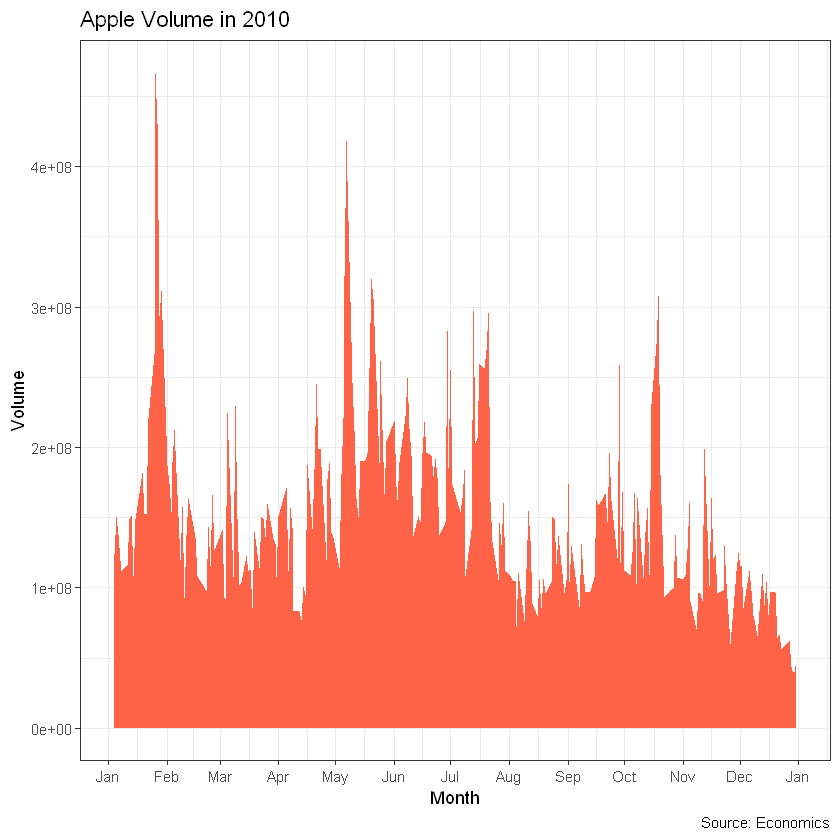

In [42]:
apple %>%
mutate(Date = as.Date(Date, '%Y-%m-%d')) %>%
filter(format(Date, '%Y') == '2010') %>%
ggplot(aes(Date, Volume)) +
geom_area(fill = 'tomato') +
scale_x_date(date_breaks = '1 month', date_labels = '%b') +
labs(title = 'Apple Volume in 2010', 
     x = 'Month',
     caption = 'Source: Economics') +
theme_bw()

# Calendar Heatmap

In [43]:
df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")
head(df)

date,VIX.Open,VIX.High,VIX.Low,VIX.Close,VIX.Volume,VIX.Adjusted,year,month,monthf,weekday,weekdayf,week
2007-01-03,12.16,12.75,11.53,12.04,0,12.04,2007,1,Jan,3,Wed,1
2007-01-04,12.40,12.42,11.28,11.51,0,11.51,2007,1,Jan,4,Thu,1
2007-01-05,11.84,12.25,11.68,12.14,0,12.14,2007,1,Jan,5,Fri,1
2007-01-08,12.48,12.83,11.78,12.00,0,12.00,2007,1,Jan,1,Mon,2
2007-01-09,11.86,12.47,11.69,11.91,0,11.91,2007,1,Jan,2,Tue,2
2007-01-10,12.34,12.50,11.43,11.47,0,11.47,2007,1,Jan,3,Wed,2


In [57]:
#Calculate week of month
df <- df %>%
group_by(year, monthf) %>%
mutate(weekmonth = 1 + week - min(week)) %>%
ungroup() 

df %>% head(20)

date,VIX.Open,VIX.High,VIX.Low,VIX.Close,VIX.Volume,VIX.Adjusted,year,month,monthf,weekday,weekdayf,week,weekmonth
2007-01-03,12.16,12.75,11.53,12.04,0,12.04,2007,1,Jan,3,Wed,1,1
2007-01-04,12.40,12.42,11.28,11.51,0,11.51,2007,1,Jan,4,Thu,1,1
2007-01-05,11.84,12.25,11.68,12.14,0,12.14,2007,1,Jan,5,Fri,1,1
2007-01-08,12.48,12.83,11.78,12.00,0,12.00,2007,1,Jan,1,Mon,2,2
2007-01-09,11.86,12.47,11.69,11.91,0,11.91,2007,1,Jan,2,Tue,2,2
2007-01-10,12.34,12.50,11.43,11.47,0,11.47,2007,1,Jan,3,Wed,2,2
2007-01-11,11.42,11.48,10.50,10.87,0,10.87,2007,1,Jan,4,Thu,2,2
2007-01-12,10.93,10.93,10.14,10.15,0,10.15,2007,1,Jan,5,Fri,2,2
2007-01-16,10.64,10.89,10.40,10.74,0,10.74,2007,1,Jan,2,Tue,3,3
2007-01-17,10.90,10.90,10.35,10.59,0,10.59,2007,1,Jan,3,Wed,3,3


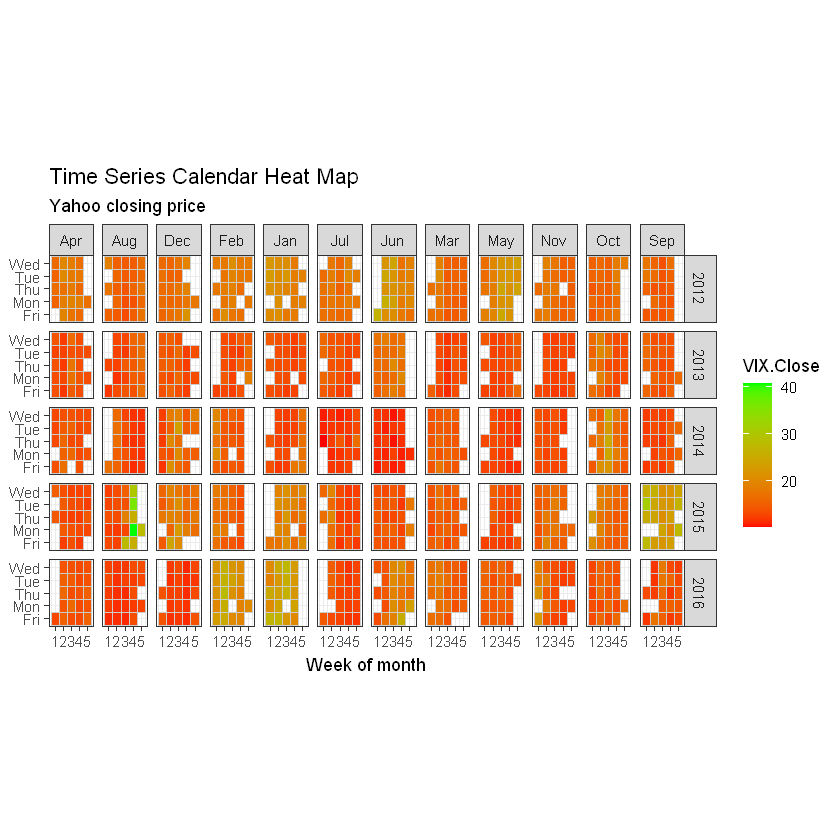

In [72]:
df %>%
filter(year >= 2012) %>%
ggplot(aes(weekmonth, weekdayf, fill = VIX.Close)) +
geom_tile(color = 'grey80') + 
facet_grid(year ~ monthf) +
scale_fill_gradient(low = 'red', high = 'green') + 
labs(title = 'Time Series Calendar Heat Map', 
     subtitle = 'Yahoo closing price',
     y = NULL,
     x = 'Week of month') +
theme_bw() +
theme(aspect.ratio = 3 / 2)

# Slope Chart

Slope chart is a great tool of you want to visualize change in value and ranking between categories. This is more suitable over a time series when there are very few time points.

Loading required package: reshape2
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textB

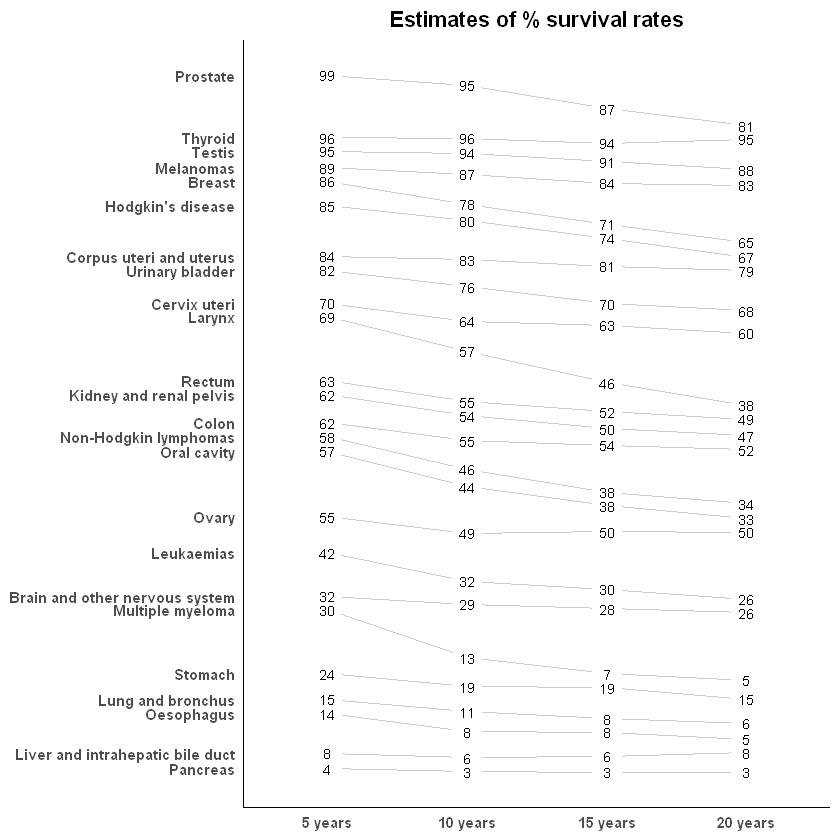

In [211]:
library(dplyr)
theme_set(theme_classic())
source_df <- read.csv("https://raw.githubusercontent.com/jkeirstead/r-slopegraph/master/cancer_survival_rates.csv")

# Define functions. Source: https://github.com/jkeirstead/r-slopegraph
tufte_sort <- function(df, x="year", y="value", group="group", method="tufte", min.space=0.05) {
    ## First rename the columns for consistency
    ids <- match(c(x, y, group), names(df))
    df <- df[,ids]
    names(df) <- c("x", "y", "group")

    ## Expand grid to ensure every combination has a defined value
    tmp <- expand.grid(x=unique(df$x), group=unique(df$group))
    tmp <- merge(df, tmp, all.y=TRUE)
    df <- mutate(tmp, y=ifelse(is.na(y), 0, y))
  
    ## Cast into a matrix shape and arrange by first column
    require(reshape2)
    tmp <- dcast(df, group ~ x, value.var="y")
    ord <- order(tmp[,2])
    tmp <- tmp[ord,]
    
    min.space <- min.space*diff(range(tmp[,-1]))
    yshift <- numeric(nrow(tmp))
    ## Start at "bottom" row
    ## Repeat for rest of the rows until you hit the top
    for (i in 2:nrow(tmp)) {
        ## Shift subsequent row up by equal space so gap between
        ## two entries is >= minimum
        mat <- as.matrix(tmp[(i-1):i, -1])
        d.min <- min(diff(mat))
        yshift[i] <- ifelse(d.min < min.space, min.space - d.min, 0)
    }

    
    tmp <- cbind(tmp, yshift=cumsum(yshift))

    scale <- 1
    tmp <- melt(tmp, id=c("group", "yshift"), variable.name="x", value.name="y")
    ## Store these gaps in a separate variable so that they can be scaled ypos = a*yshift + y

    tmp <- transform(tmp, ypos=y + scale*yshift)
    return(tmp)
   
}

plot_slopegraph <- function(df) {
    ylabs <- subset(df, x==head(x,1))$group
    yvals <- subset(df, x==head(x,1))$ypos
    fontSize <- 3
    gg <- ggplot(df,aes(x=x,y=ypos)) +
        geom_line(aes(group=group),colour="grey80") +
        geom_point(colour="white",size=8) +
        geom_text(aes(label=y), size=fontSize, family="American Typewriter") +
        scale_y_continuous(name="", breaks=yvals, labels=ylabs)
    return(gg)
}    

## Prepare data    
df <- tufte_sort(source_df, 
                 x="year", 
                 y="value", 
                 group="group", 
                 method="tufte", 
                 min.space=0.05)

df <- transform(df, 
                x=factor(x, levels=c(5,10,15,20), 
                            labels=c("5 years","10 years","15 years","20 years")), 
                y=round(y))

## Plot
plot_slopegraph(df) + labs(title="Estimates of % survival rates") + 
                      theme(axis.title=element_blank(),
                            axis.ticks = element_blank(),
                            plot.title = element_text(hjust=0.5,
                                                      family = "American Typewriter",
                                                      face="bold"),
                            axis.text = element_text(family = "American Typewriter",
                                                     face="bold"))

# Seasonal Plot 

In [116]:
electric <- read.csv('./electric_production.csv')
head(electric)

DATE,IPG2211A2N
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904


In [87]:
format(as.Date('1/2/1985', '%m/%m/%Y'), '%m')

[1] "02"

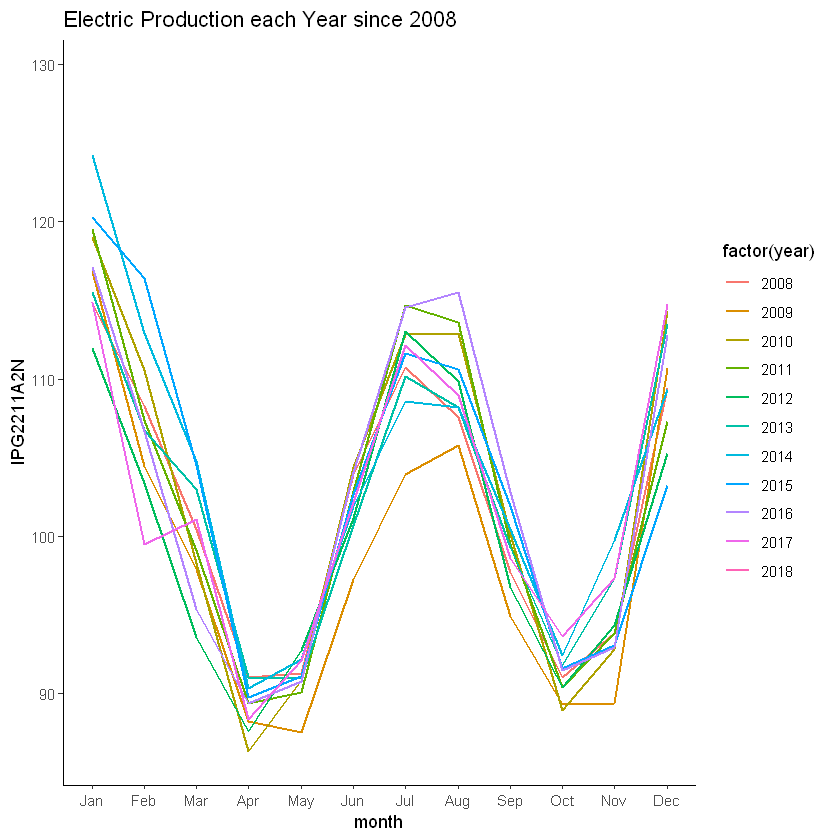

In [115]:
electric %>%
mutate(DATE = as.Date(DATE, '%m/%d/%Y')) %>%
mutate(year = as.integer(format(DATE, '%Y')), 
       month = as.integer(format(DATE, '%m'))) %>% 
filter(year >= 2008) %>%
ggplot(aes(month, IPG2211A2N, color = factor(year))) +
geom_line(size = .8) +
scale_x_continuous(breaks = 1:12, labels = month.abb) +
labs(title = 'Electric Production each Year since 2008') +
theme_classic()